In [26]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [27]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [28]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [29]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [30]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.41128799425028784, 0.6238174398872671],
 'diameter': 53.05099412332228,
 'confidence': 1.0,
 'timestamp': -899181.189999,
 'sphere': {'center': [3.829720940486187,
   -1.168456270937277,
   44.56060538942354],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [120.1994910905795, 88.4949411212329],
  'axes': [157.82538558971942, 157.82538558971942],
  'angle': 0.0},
 'circle_3d': {'center': [-1.83742244929264,
   -2.8698592954088564,
   36.01726215928201],
  'normal': [-0.5453211269375023, -0.16371758236311829, -0.8220835856169297],
  'radius': 3.012627516838407},
 'diameter_3d': 6.025255033676814,
 'ellipse': {'center': [78.96729489605526, 72.2270515416447],
  'axes': [43.659571144575835, 53.05099412332228],
  'angle': 20.49822941656457},
 'location': [78.96729489605526, 72.2270515416447],
 'model_confidence': 1.0,
 'theta': 1.7352542398424373,
 'phi': -2.1564924859682835}

Text(0.5, 0, 'Pupil timestamp (s)')

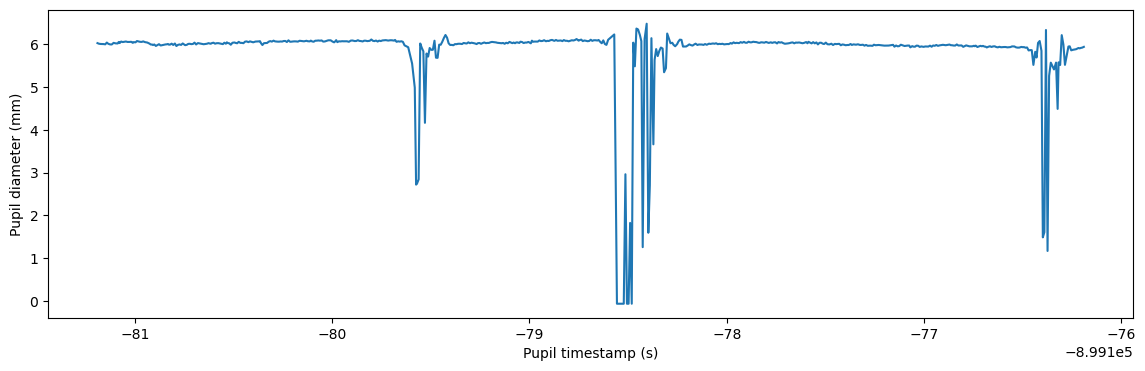

In [31]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')